In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

In [31]:
df = pd.read_csv('wine.csv')
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.shape

(178, 14)

In [32]:
df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [33]:
df.info

<bound method DataFrame.info of      Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids 

In [34]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [35]:
df1 = df.iloc[:,1:14]
df1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [36]:
df1.shape

(178, 13)

Alcohol


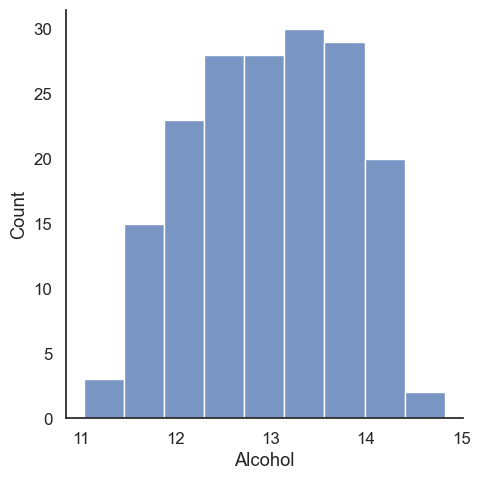

<Figure size 2000x1000 with 0 Axes>

Malic


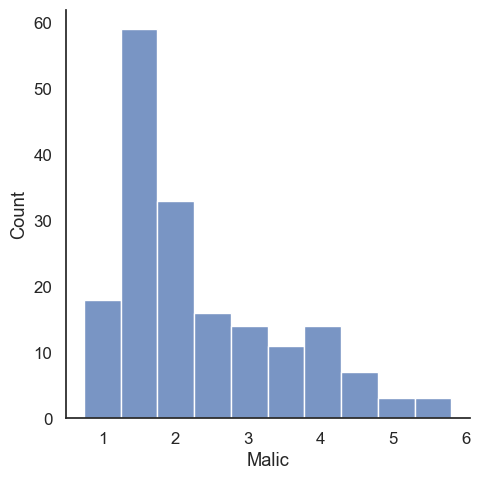

<Figure size 2000x1000 with 0 Axes>

Ash


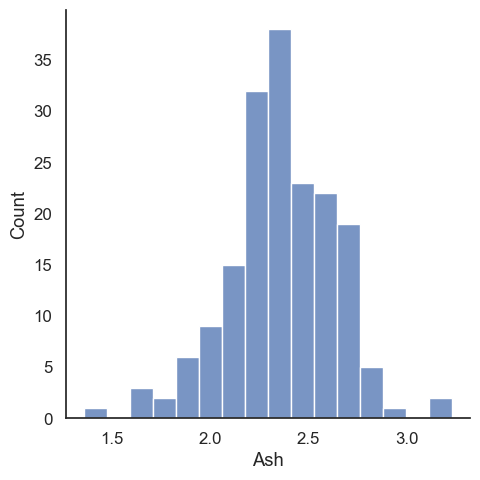

<Figure size 2000x1000 with 0 Axes>

Alcalinity


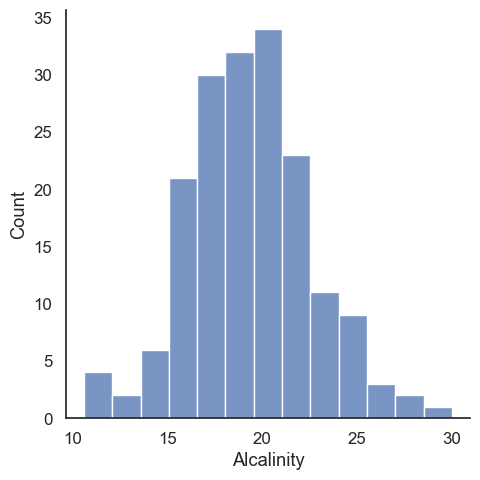

<Figure size 2000x1000 with 0 Axes>

Magnesium


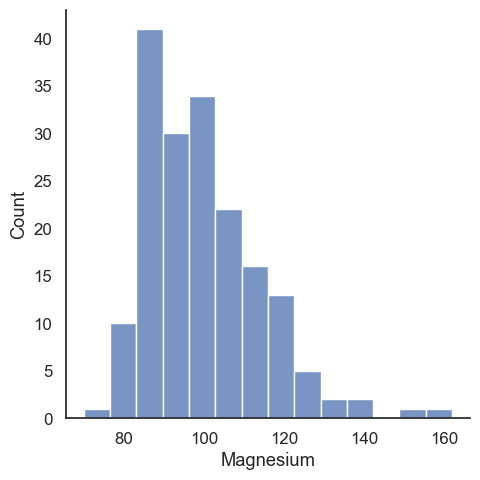

<Figure size 2000x1000 with 0 Axes>

Phenols


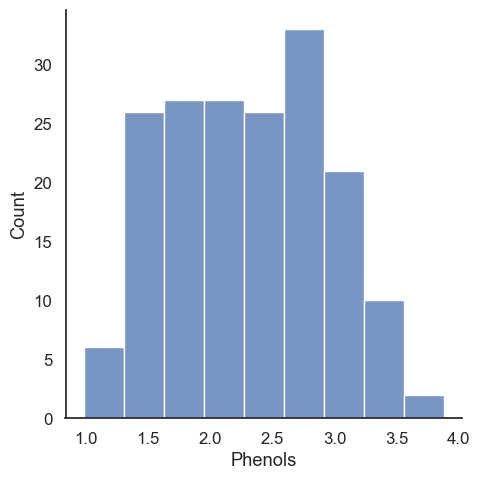

<Figure size 2000x1000 with 0 Axes>

Flavanoids


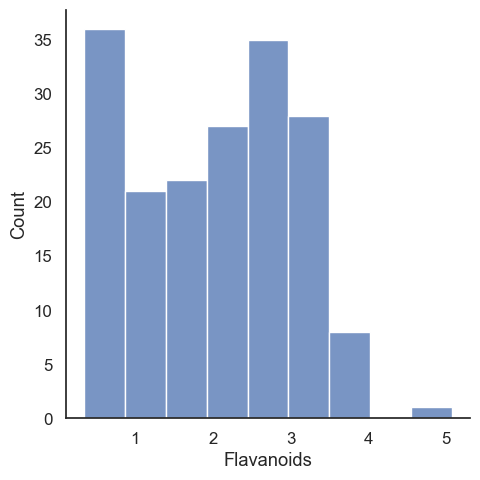

<Figure size 2000x1000 with 0 Axes>

Nonflavanoids


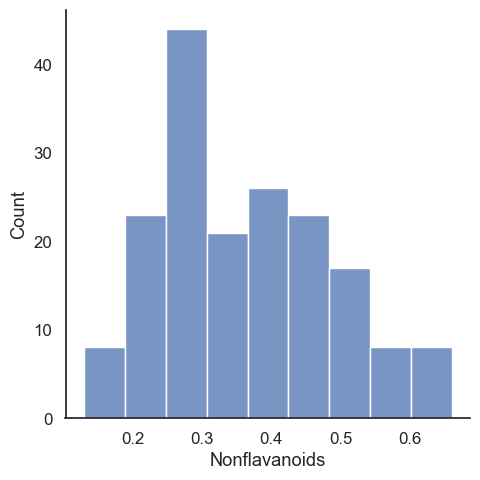

<Figure size 2000x1000 with 0 Axes>

Proanthocyanins


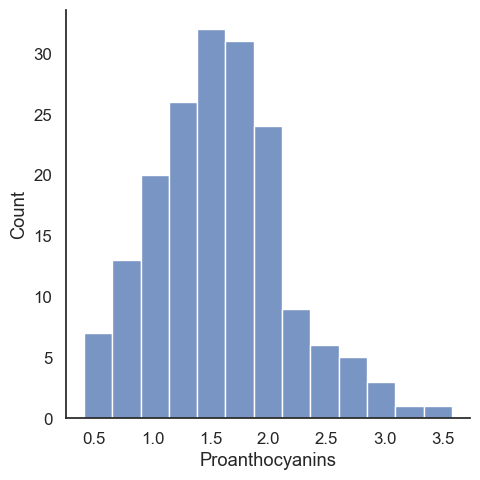

<Figure size 2000x1000 with 0 Axes>

Color


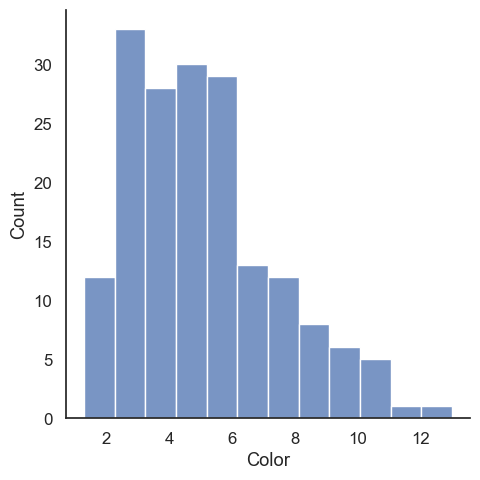

<Figure size 2000x1000 with 0 Axes>

Hue


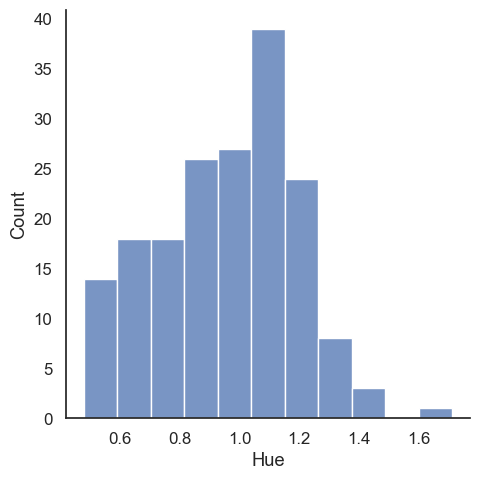

<Figure size 2000x1000 with 0 Axes>

Dilution


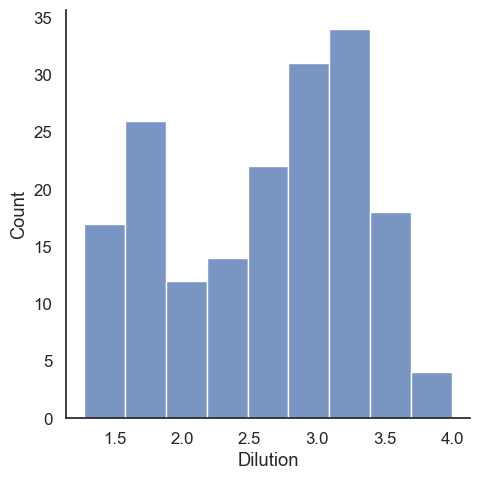

<Figure size 2000x1000 with 0 Axes>

Proline


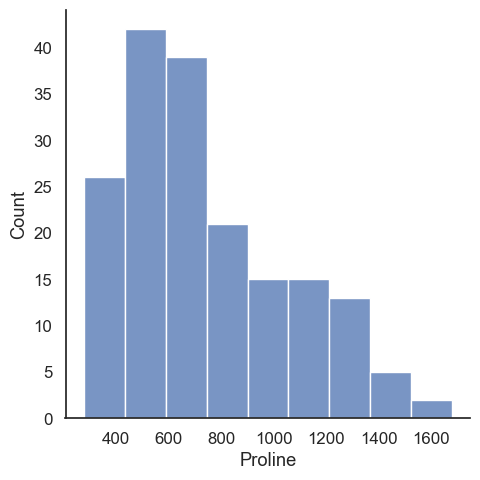

<Figure size 2000x1000 with 0 Axes>

In [37]:
#with skewness and distribution of data 
for n in df1.columns:
    print(n)
    sns.displot(df[n])
    plt.figure(figsize=(20,10))
    plt.show()

In [14]:
#Feature scaling for all of our features 
std = StandardScaler()
df_scaled = std.fit_transform(df1)

In [15]:
df_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [16]:
#fitting our pca on our scaled data 
pca = PCA(n_components=13)
pca_components = pd.DataFrame(pca.fit_transform(df_scaled),columns=['pc1','pc2','pc3','pc4','pc5',
                                                                   'pc6','pc7','pc8','pc9','pc10','pc12','pc13','pc14'])
pca_components

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc12,pc13,pc14
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416,-0.146097,-0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894,-0.552427,-0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235,0.047024,0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975,0.390829,0.057448,0.491490,0.299822,0.339821,-0.021866


In [51]:
var = (pca.explained_variance_ratio_)
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [52]:
#checking with cumulative variance 
cum_var = pd.DataFrame(np.cumsum(np.round(var,decimals=2)*100))
cum_var

,0
0,36.0
1,55.0
2,66.0
3,73.0
4,80.0
5,85.0
6,89.0
7,92.0
8,94.0
9,96.0


In [55]:
#selecting our top 8 columns 
#fitting our pca on our scaled data 
pca_2 = PCA(n_components=7)
pca_final = pd.DataFrame(pca_2.fit_transform(df_scaled),columns=['pc1','pc2','pc3','pc4','pc5',
                                                                   'pc6','pc7'])
pca_final

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074
...,...,...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527,-0.574164,-1.108788,0.958416
174,-2.601956,-1.757229,0.207581,0.349496,0.255063,-0.026465,0.146894
175,-2.677839,-2.760899,-0.940942,0.312035,1.271355,0.273068,0.679235
176,-2.387017,-2.297347,-0.550696,-0.688285,0.813955,1.178783,0.633975


In [56]:
#Clustering with KMeans using Standard scalar
from sklearn.metrics import silhouette_score,silhouette_samples
n_clusters = [2,3,4,5]
clusters_inertia = []
s_scores = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n,init='k-means++').fit(pca_final)
    clusters_inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(pca_final,kmeans.labels_)
    s_scores.append(silhouette_avg)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


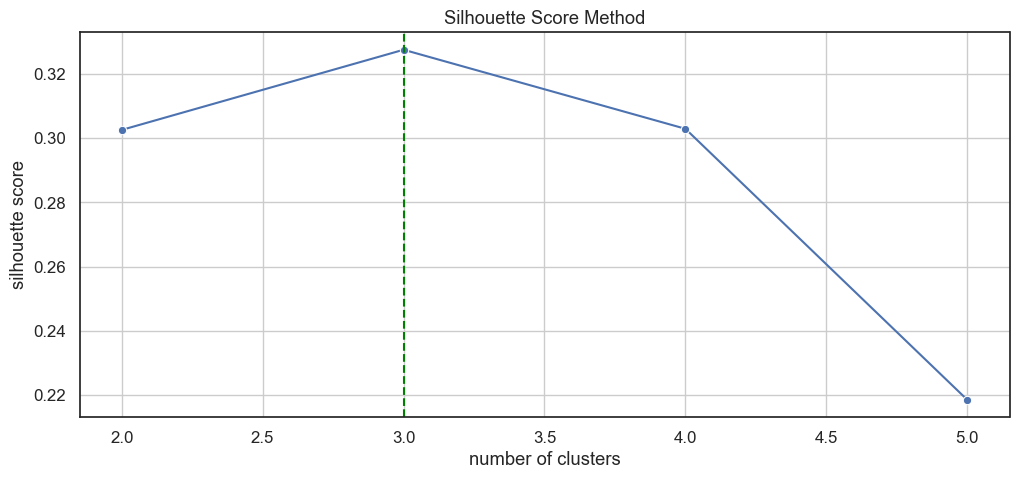

In [57]:
fig,ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters,s_scores,marker='o',ax=ax)
ax.set_title('Silhouette Score Method')
ax.set_xlabel('number of clusters')
ax.set_ylabel('silhouette score')
ax.axvline(3,ls="--",c='green')
plt.grid()
plt.show()


In [58]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable


Elbow plot for PCA Data


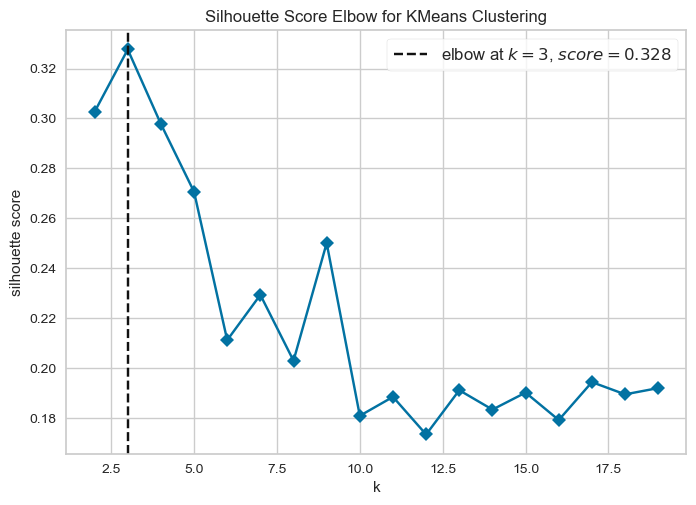

In [70]:
from yellowbrick.cluster import KElbowVisualizer
#visualizing silhouette score with Kelbow visualizer 
model = KMeans(random_state=10,max_iter=500,init='k-means++')
visualizer = KElbowVisualizer(model,k=(2,20),metric='silhouette',timings=False)
print('Elbow plot for PCA Data')
visualizer.fit(pca_final)
visualizer.show()
plt.show()

In [71]:
#alternative method 
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_final)
    sil_score1= silhouette_score(pca_final, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.3026287263777471
For n_clusters = 3 The average silhouette_score is : 0.3276351722402824
For n_clusters = 4 The average silhouette_score is : 0.28347690904854134
For n_clusters = 5 The average silhouette_score is : 0.3021803467562518
For n_clusters = 6 The average silhouette_score is : 0.2691851823319872
For n_clusters = 7 The average silhouette_score is : 0.19196827283789947
For n_clusters = 8 The average silhouette_score is : 0.16906580094673318
For n_clusters = 9 The average silhouette_score is : 0.20938136071947747


In [72]:
#Building KMeans algorithm with clusters = 3
model_kmeans = KMeans(n_clusters=3,random_state=0,init='k-means++')
kmean_pred = model_kmeans.fit_predict(pca_final)
kmean_pred.shape

(178,)

In [73]:
#checking with our cluster labels 
model_kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [74]:
#checking with centroids of labels 
model_kmeans.cluster_centers_

array([[ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03,
        -1.35498147e-01, -1.34912110e-01, -2.18283242e-01,
         5.21099249e-02],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01,
         6.24569372e-02,  7.36759999e-02,  9.99252193e-02,
        -6.03831729e-02],
       [-3.69566084e-02,  1.77223945e+00,  1.86138728e-01,
         8.02397126e-02,  7.08780744e-02,  1.29805766e-01,
        -2.32728507e-03]])

In [75]:
model_kmeans.inertia_

1032.4055597618133

In [76]:
df['Kmeans_label_std'] = model_kmeans.labels_

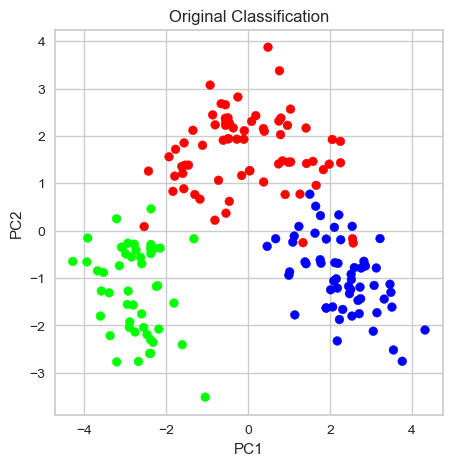

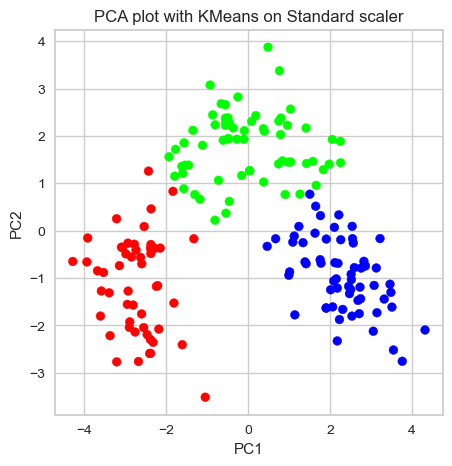

In [77]:
#plotting with original and after application of pca
# Scatterplot
plt.figure(figsize=(5,5))
plt.scatter(pca_final.iloc[:,0], pca_final.iloc[:,1], c=df['Type'], cmap="brg", s=40)
plt.title('Original Classification')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


plt.figure(figsize=(5,5))
plt.scatter(pca_final.iloc[:,0], pca_final.iloc[:,1], c=df['Kmeans_label_std'], cmap="brg", s=40)
plt.title('PCA plot with KMeans on Standard scaler')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [78]:
# Group data by Clusters (K=3)
df.groupby('Kmeans_label_std').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label_std,,,,,,,,,,,,,,
0,1.048387,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
1,2.941176,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
2,2.000000,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


In [79]:
df2 = df.copy()
df2.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_label_std
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [80]:
#dropping our first cluster column
df2.drop(['Kmeans_label_std'],axis=1,inplace=True)
df2.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [81]:
#transfroming our data using min max scalar
min_max = MinMaxScaler()
df_min_max = min_max.fit_transform(df2)
df_min_max

<IPython.core.display.Javascript object>

array([[0.        , 0.84210526, 0.1916996 , ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.        , 0.57105263, 0.2055336 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.        , 0.56052632, 0.3201581 , ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [1.        , 0.58947368, 0.69960474, ..., 0.08943089, 0.10622711,
        0.39728959],
       [1.        , 0.56315789, 0.36561265, ..., 0.09756098, 0.12820513,
        0.40085592],
       [1.        , 0.81578947, 0.66403162, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [82]:
#fitting our pca on our scaled data 
pca_min = PCA(n_components=13)
pca_components_min = pd.DataFrame(pca_min.fit_transform(df_min_max),columns=['pc1','pc2','pc3','pc4','pc5',
                                                                   'pc6','pc7','pc8','pc9','pc10','pc12','pc13','pc14'])
pca_components_min

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc12,pc13,pc14
0,-0.847604,-0.243146,0.029752,-0.047430,-0.002728,0.038810,0.049146,0.114127,-0.107955,0.291353,0.089500,-0.047503,0.045398
1,-0.678651,-0.005712,-0.283970,0.001458,-0.248171,-0.026104,-0.013032,-0.135043,0.082117,0.092704,0.098223,-0.078803,0.055369
2,-0.700372,-0.183868,0.197457,0.004297,0.049228,-0.044054,0.141187,-0.086726,-0.167860,-0.148520,-0.030256,-0.035738,0.074816
3,-0.936076,-0.566967,0.093919,-0.110809,0.092336,-0.106658,-0.071420,-0.093214,0.079009,0.026887,0.159666,0.118646,-0.000236
4,-0.454077,-0.063348,0.286092,0.179782,0.008012,0.182285,0.067237,-0.035410,0.058584,0.101458,-0.195057,-0.009654,0.009707
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.898916,-0.482112,0.203259,0.012476,-0.342452,-0.032776,0.066883,0.070463,0.060195,-0.048335,0.085700,-0.029515,0.008320
174,0.785427,-0.353231,0.088418,-0.075360,0.008066,0.043131,0.044505,0.067033,-0.006887,-0.092515,0.024457,0.062745,-0.004699
175,0.820658,-0.552469,-0.020750,-0.166405,-0.015765,0.021907,0.193634,-0.036957,-0.004505,0.051149,0.092752,-0.103362,-0.117647
176,0.777268,-0.430255,-0.095511,0.051361,0.215166,-0.044780,0.161557,-0.064202,-0.063602,0.155148,0.105013,-0.013896,-0.032575


In [83]:
#plotting scatter plot 
sns.scatterplot(x=pca_components_min.pc1,y=pca_components_min.pc2,palette='dark')


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

In [84]:
#checking with explained variance for our columns 
var_min = (pca_min.explained_variance_ratio_)
var_min

array([0.51003634, 0.14853339, 0.06702619, 0.06257153, 0.05009893,
       0.03837954, 0.02882988, 0.01963591, 0.01828022, 0.01769633,
       0.01483498, 0.01075837, 0.00837412])

In [85]:
#checking with cumulative variance 
cum_var_min = pd.DataFrame(np.cumsum(np.round(var_min,decimals=2)*100))
cum_var_min

,0
0,51.0
1,66.0
2,73.0
3,79.0
4,84.0
5,88.0
6,91.0
7,93.0
8,95.0
9,97.0


In [86]:
plt.bar(range(1, len(var_min)+1),var_min)
plt.xlabel('Number of Components')
plt.ylabel('variance (%)')
plt.title('Explained variance by each component')


Text(0.5, 1.0, 'Explained variance by each component')

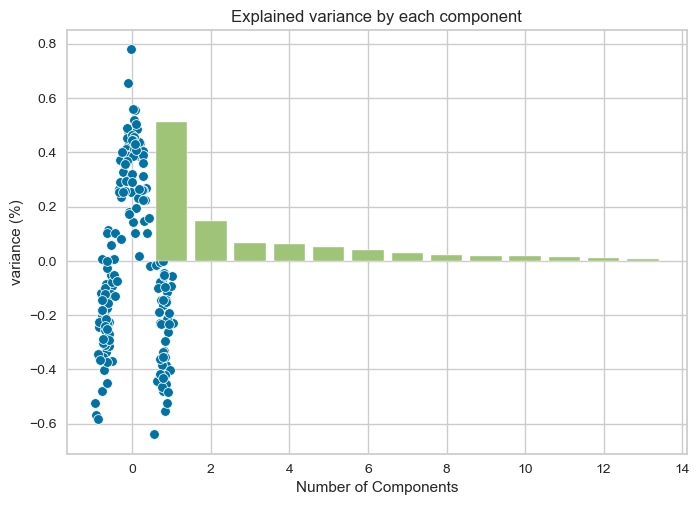

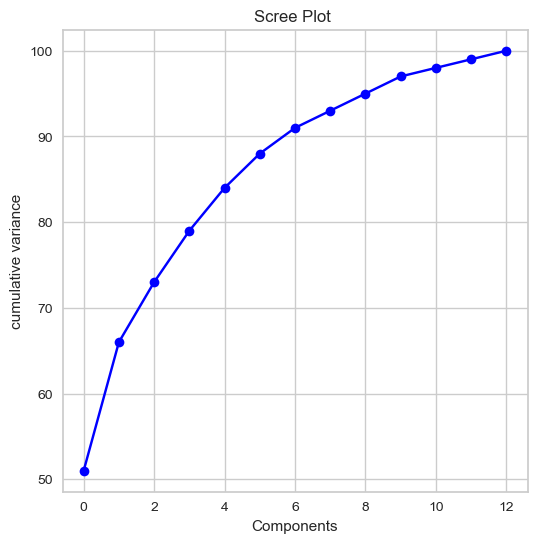

In [87]:
#plotting scree plot 
plt.figure(figsize=(6,6))
plt.plot(cum_var_min,color = 'blue',marker = 'o')
plt.title('Scree Plot ')
plt.xlabel('Components')
plt.ylabel('cumulative variance')
plt.show()

In [88]:
#selecting our top 3 pca components 
pca_min_final = PCA(n_components=3)
pca_components_min_final = pd.DataFrame(pca_min_final.fit_transform(df_min_max),columns=['pc1','pc2','pc3'
                                                                  ])
pca_components_min_final

,pc1,pc2,pc3
0,-0.847604,-0.243146,0.029752
1,-0.678651,-0.005712,-0.283970
2,-0.700372,-0.183868,0.197457
3,-0.936076,-0.566967,0.093919
4,-0.454077,-0.063348,0.286092
...,...,...,...
173,0.898916,-0.482112,0.203259
174,0.785427,-0.353231,0.088418
175,0.820658,-0.552469,-0.020750
176,0.777268,-0.430255,-0.095511


In [89]:
#clustering with KMeans for MinMax Scaler
n_clusters = [2,3,4,5]
clusters_inertia = []
s_scores = []

Elbow plot for PCA Data


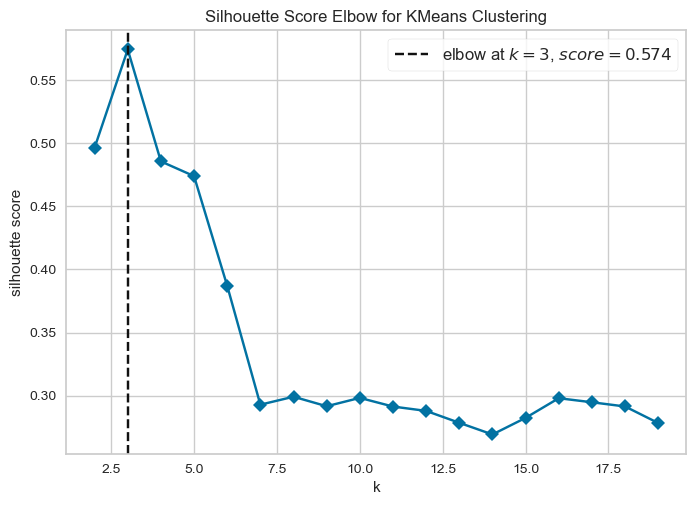

In [90]:
#visualizing silhouette score with Kelbow visualizer 
model_min = KMeans(random_state=10,max_iter=500,init='k-means++')
visualizer = KElbowVisualizer(model_min,k=(2,20),metric='silhouette',timings=False)
print('Elbow plot for PCA Data')
visualizer.fit(pca_components_min_final)
visualizer.show()
plt.show()

In [91]:
#alternative method 
clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for minmax Scaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(pca_components_min_final)
    sil_score1= silhouette_score(pca_components_min_final, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)


For n_clusters = 2 The average silhouette_score is : 0.4964482877288064
For n_clusters = 3 The average silhouette_score is : 0.5742903318722891
For n_clusters = 4 The average silhouette_score is : 0.48561835974400647
For n_clusters = 5 The average silhouette_score is : 0.46953563378640967
For n_clusters = 6 The average silhouette_score is : 0.3704455035591312
For n_clusters = 7 The average silhouette_score is : 0.3180044216560208
For n_clusters = 8 The average silhouette_score is : 0.299769232627445
For n_clusters = 9 The average silhouette_score is : 0.3112885463091425


In [93]:
model_kmeans_min = KMeans(n_clusters=3,random_state=0,init='k-means++')
kmean_pred_min = model_kmeans_min.fit_predict(pca_components_min_final)
kmean_pred_min.shape

(178,)

In [94]:
#checking with our cluster ids 
model_kmeans_min.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [95]:
#checking with the centroids of clusters 
model_kmeans_min.cluster_centers_

array([[ 7.94800855e-01, -2.39602856e-01,  6.92839230e-04],
       [ 2.07947321e-02,  3.49009117e-01,  4.45609801e-03],
       [-6.73001307e-01, -2.05684819e-01, -5.69033142e-03]])

In [96]:
#checking with our inertia, the lower the inertia , the better the clusters formed 
#it also means clusters are denser and closer to each other 
model_kmeans_min.inertia_

16.734135217329108

In [97]:
df2['Kmeans_label_min'] = model_kmeans_min.labels_

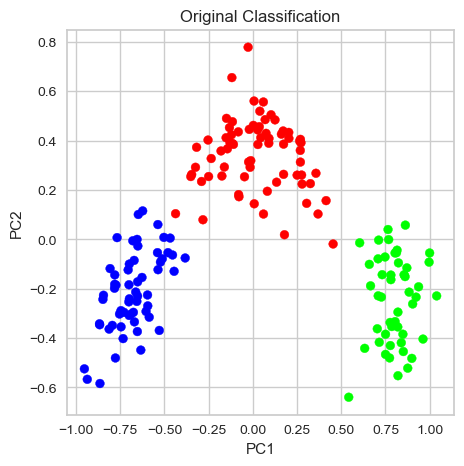

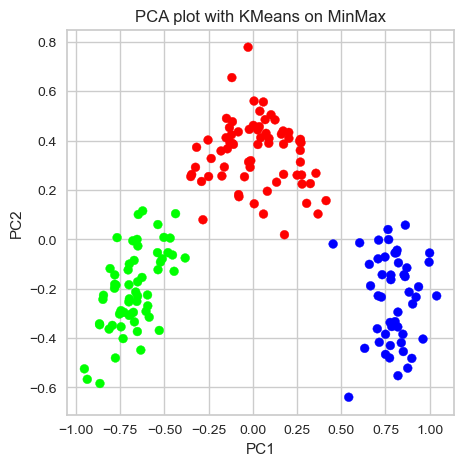

In [98]:
plt.figure(figsize=(5,5))
plt.scatter(pca_components_min_final.iloc[:,0], pca_components_min_final.iloc[:,1], c=df2['Type'], cmap="brg", s=40)
plt.title('Original Classification')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


plt.figure(figsize=(5,5))
plt.scatter(pca_components_min_final.iloc[:,0], pca_components_min_final.iloc[:,1], c=df2['Kmeans_label_min'], cmap="brg", s=40)
plt.title('PCA plot with KMeans on MinMax')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [99]:
# Group data by Clusters (K=3)
df2.groupby('Kmeans_label_min').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Kmeans_label_min,,,,,,,,,,,,,,
0,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020
1,2.000000,12.257246,1.908551,2.238551,20.063768,94.043478,2.252609,2.076232,0.362319,1.625652,3.057971,1.055739,2.786232,512.826087
2,1.016667,13.732167,2.005000,2.458000,17.253333,106.883333,2.847833,2.980833,0.288667,1.900333,5.492000,1.066167,3.163500,1113.533333


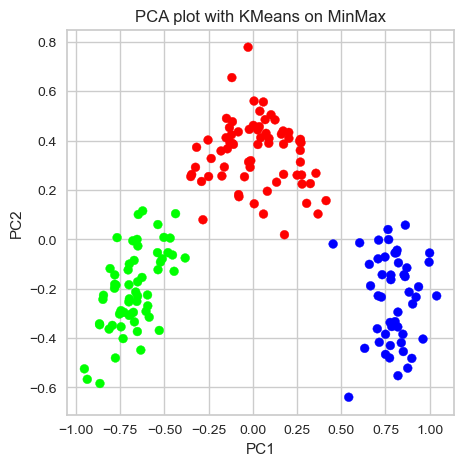

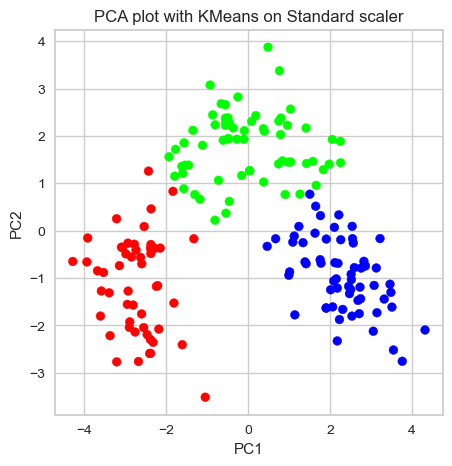

In [100]:
#plotting the accuracy between minmax and standard scaler 
plt.figure(figsize=(5,5))
plt.scatter(pca_components_min_final.iloc[:,0], pca_components_min_final.iloc[:,1], c=df2['Kmeans_label_min'], cmap="brg", s=40)
plt.title('PCA plot with KMeans on MinMax')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


plt.figure(figsize=(5,5))
plt.scatter(pca_final.iloc[:,0], pca_final.iloc[:,1], c=df['Kmeans_label_std'], cmap="brg", s=40)
plt.title('PCA plot with KMeans on Standard scaler')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [101]:
#
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(df_min_max)

<IPython.core.display.Javascript object>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [102]:
tsne_df = pd.DataFrame(data=X_tsne,columns=['tsne_1','tsne_2'])
tsne_df

,tsne_1,tsne_2
0,-0.773617,18.310495
1,-0.749254,14.244893
2,-3.518666,16.580984
3,-3.983587,18.805208
4,-3.825481,12.892669
...,...,...
173,1.607320,-18.693090
174,0.037262,-18.738522
175,-0.628199,-19.945492
176,-0.100864,-19.960987


In [103]:
#since pca and tsne are unsupervised algorithms we will use the kmeans cluster for plotting 
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=df2['Kmeans_label_min'], cmap="brg", s=40)

# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

Text(0, 0.5, 'tsne component 2')

In [104]:
import scipy.cluster.hierarchy as sch
#Agglomerative clustering on minmax scaled data
for methods in ['single','complete','centroid','average','weighted','median','ward']:
    plt.figure(figsize=(20,6))
    dict = {'fontsize':20,'fontweight':12,'color':'red'}
    
    plt.title('Visualizing data clustering,Method- {}'.format(methods),fontdict=dict)
    Dendrogram = sch.dendrogram(sch.linkage(pca_components_min_final,method=methods,optimal_ordering=False))

In [105]:
# Applying Different Linkages using Euclidean Method for distance Calculation
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single","ward"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_components_min_final)
        silhouette_score1 = silhouette_score(pca_components_min_final, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4106437562148734
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4954520750067069
For n_clusters = 2 The average silhouette_score with linkage- single : 0.1956897297434469
For n_clusters = 2 The average silhouette_score with linkage- ward : 0.5028007154238558

For n_clusters = 3 The average silhouette_score with linkage- complete : 0.40905822282646803
For n_clusters = 3 The average silhouette_score with linkage- average : 0.5673677512398139
For n_clusters = 3 The average silhouette_score with linkage- single : 0.06455702366101262
For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5742903318722891

For n_clusters = 4 The average silhouette_score with linkage- complete : 0.42050509534084823
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5202861583932612
For n_clusters = 4 The average silhouette_score with linkage- single : 0.32937895719670207

In [106]:
# Applying Different Linkages using Different Distance Methods
# Applying Different Linkages using Euclidean Method for distance Calculation
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single","ward"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            
            hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
            hie_labels1 = hie_cluster1.fit_predict(pca_components_min_final)
            silhouette_score1 = silhouette_score(pca_components_min_final, hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.4106437562148734
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.4106437562148734
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.4106437562148734
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.4106437562148734
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.4106437562148734

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.4954520750067069
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.4954520750067069
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.4954520750067069
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhattan : 0.4954520

In [107]:
#Agglomerative clustering on Standard scaled data
for methods in ['single','complete','centroid','average','weighted','median','ward']:
    plt.figure(figsize=(20,6))
    dict = {'fontsize':20,'fontweight':12,'color':'red'}
    
    plt.title('Visualizing data clustering,Method- {}'.format(methods),fontdict=dict)
    Dendrogram = sch.dendrogram(sch.linkage(pca_final,method=methods,optimal_ordering=False))


In [108]:
# Applying Different Linkages using Euclidean Method for distance Calculation
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single","ward"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_final)
        silhouette_score1 = silhouette_score(pca_final, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- complete : 0.044496369450363116
For n_clusters = 2 The average silhouette_score with linkage- average : 0.28077784199633277
For n_clusters = 2 The average silhouette_score with linkage- single : 0.24760969845936331
For n_clusters = 2 The average silhouette_score with linkage- ward : 0.2806399468468385

For n_clusters = 3 The average silhouette_score with linkage- complete : 0.20270975236742092
For n_clusters = 3 The average silhouette_score with linkage- average : 0.203716541419447
For n_clusters = 3 The average silhouette_score with linkage- single : 0.20465340965013604
For n_clusters = 3 The average silhouette_score with linkage- ward : 0.3087427392831592

For n_clusters = 4 The average silhouette_score with linkage- complete : 0.25829092472887544
For n_clusters = 4 The average silhouette_score with linkage- average : 0.27257611744532717
For n_clusters = 4 The average silhouette_score with linkage- single : 0.1692320091832

In [109]:
# Applying Different Linkages using Different Distance Methods
# Applying Different Linkages using Euclidean Method for distance Calculation
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["complete", "average", "single","ward"]:
        for affinities in ["euclidean", "l1", "l2","manhattan", "cosine"]:
            
            hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # by default it takes linkage 'ward'
            hie_labels1 = hie_cluster1.fit_predict(pca_final)
            silhouette_score1 = silhouette_score(pca_final, hie_labels1)
            print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages,"and Affinity-",affinities,':',silhouette_score1)
        print()

For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- euclidean : 0.044496369450363116
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l1 : 0.044496369450363116
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- l2 : 0.044496369450363116
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- manhattan : 0.044496369450363116
For n_clusters = 2 The average silhouette_score with linkage- complete and Affinity- cosine : 0.044496369450363116

For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- euclidean : 0.28077784199633277
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l1 : 0.28077784199633277
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- l2 : 0.28077784199633277
For n_clusters = 2 The average silhouette_score with linkage- average and Affinity- manhatta

In [110]:
#running our agglomerative clustering with optimal parameters
agg_clus = AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean')
pred_hie = agg_clus.fit_predict(pca_components_min_final)
print(pred_hie.shape)
pred_hie

(178,)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [111]:
# Clustering Score

(silhouette_score(pca_components_min_final, agg_clus.labels_)*100).round(3)


57.429

In [112]:
df2['Hierarchical_labels'] = agg_clus.labels_
df2.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_label_min,Hierarchical_labels
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,2


In [113]:
df2.groupby('Hierarchical_labels').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_label_min
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,,,,,,,,,,,
0,2.000000,12.257246,1.908551,2.238551,20.063768,94.043478,2.252609,2.076232,0.362319,1.625652,3.057971,1.055739,2.786232,512.826087,1.0
1,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020,0.0
2,1.016667,13.732167,2.005000,2.458000,17.253333,106.883333,2.847833,2.980833,0.288667,1.900333,5.492000,1.066167,3.163500,1113.533333,2.0


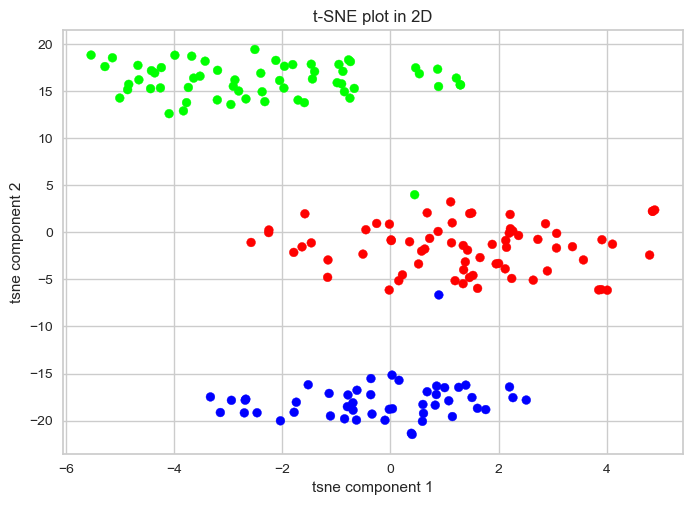

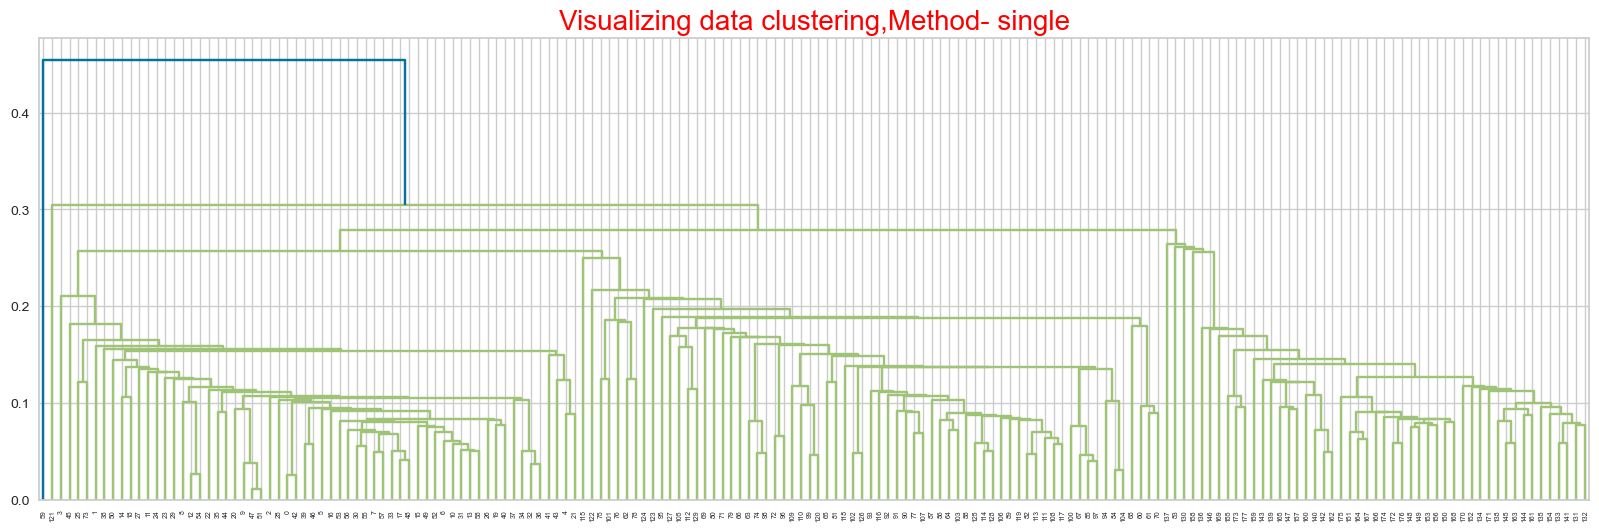

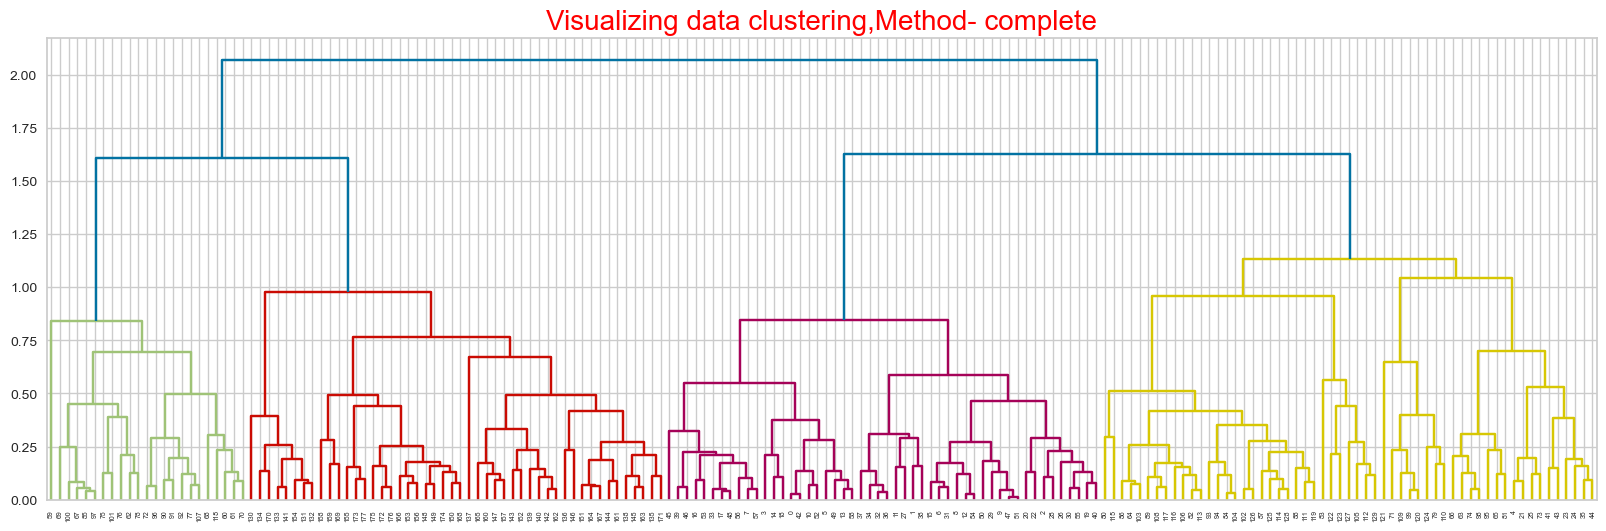

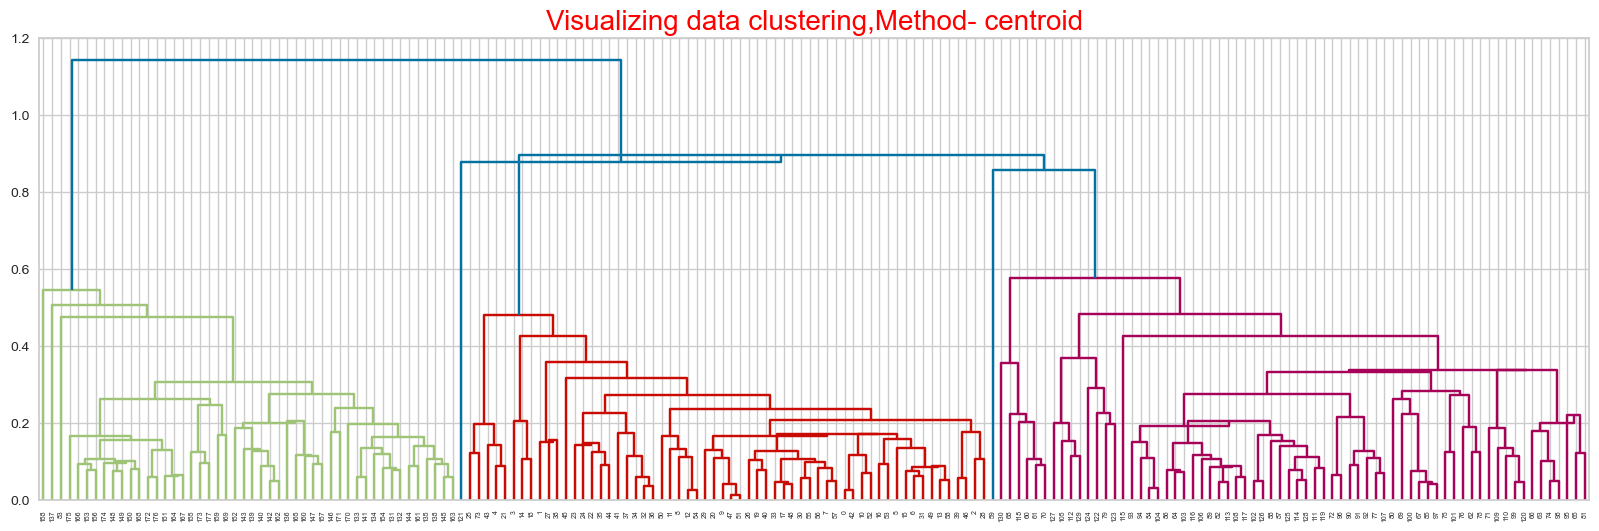

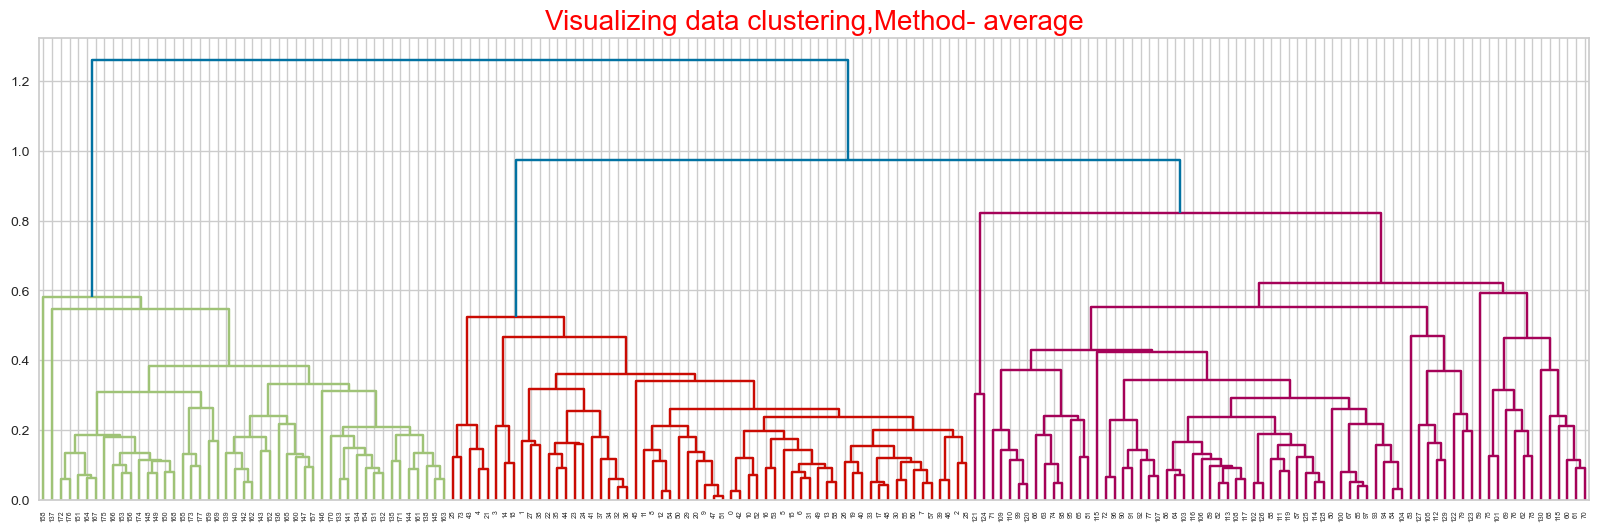

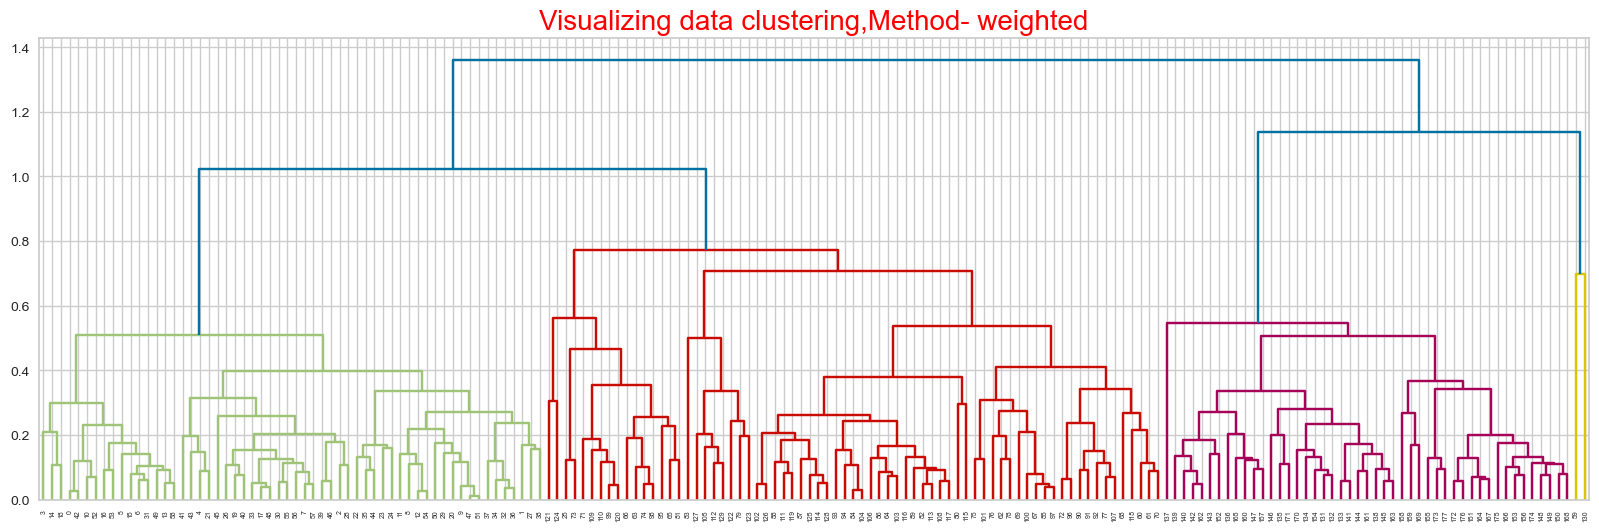

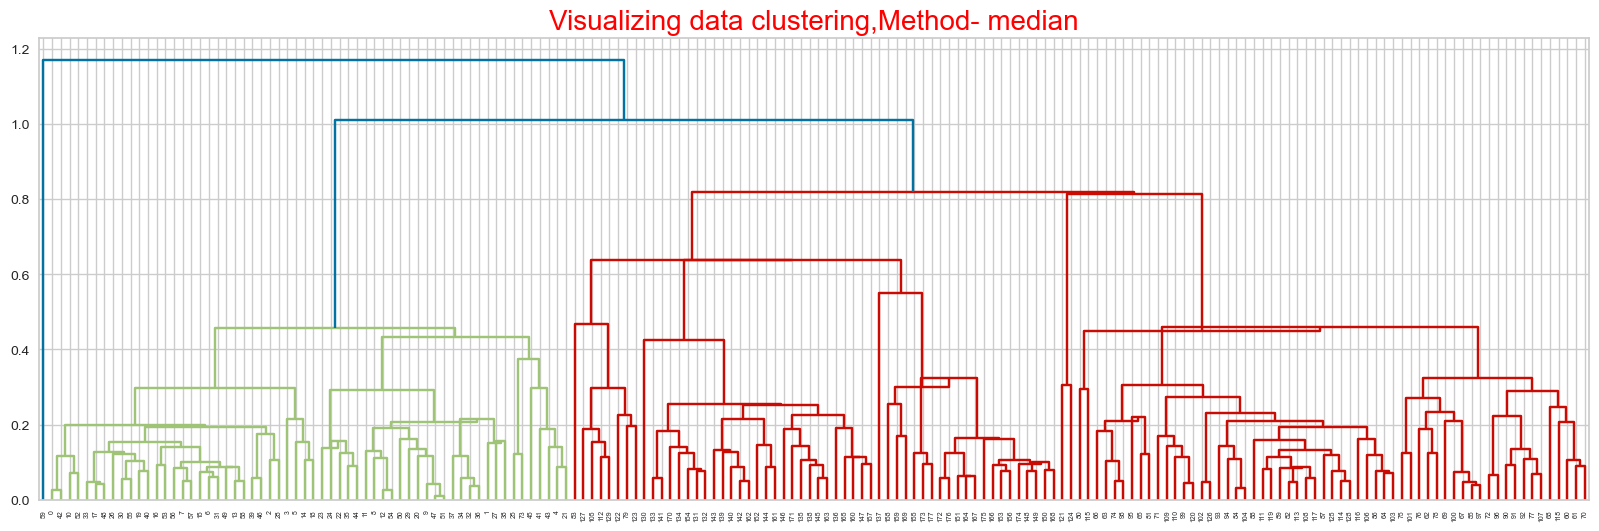

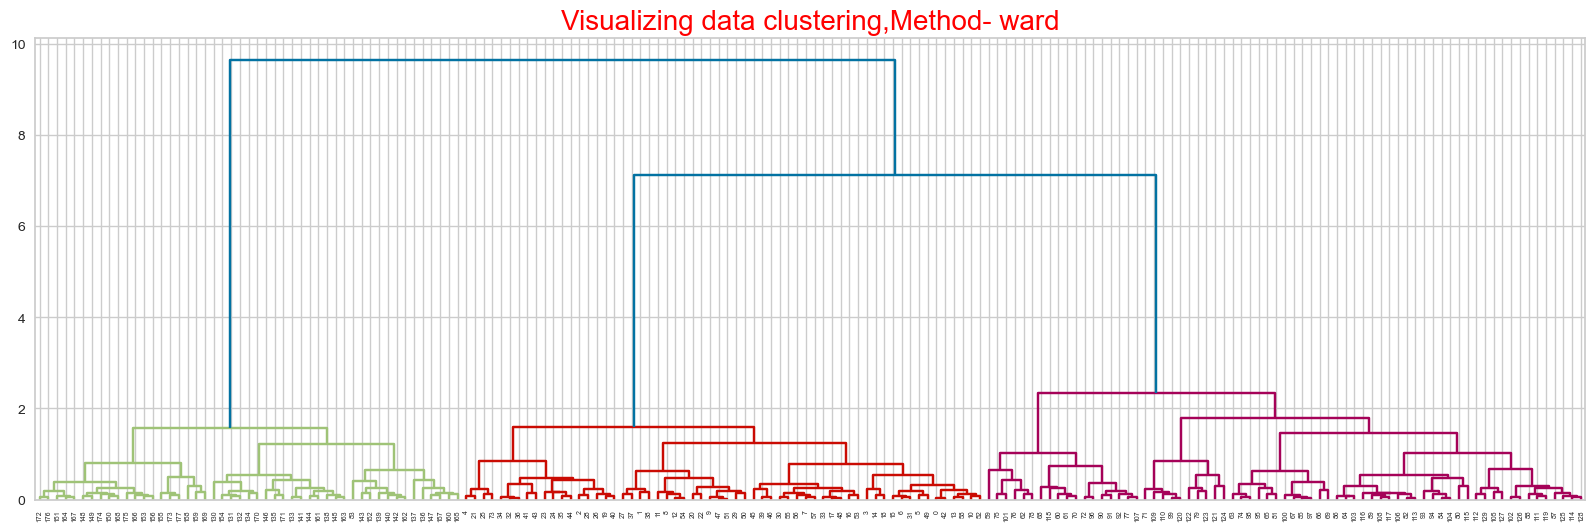

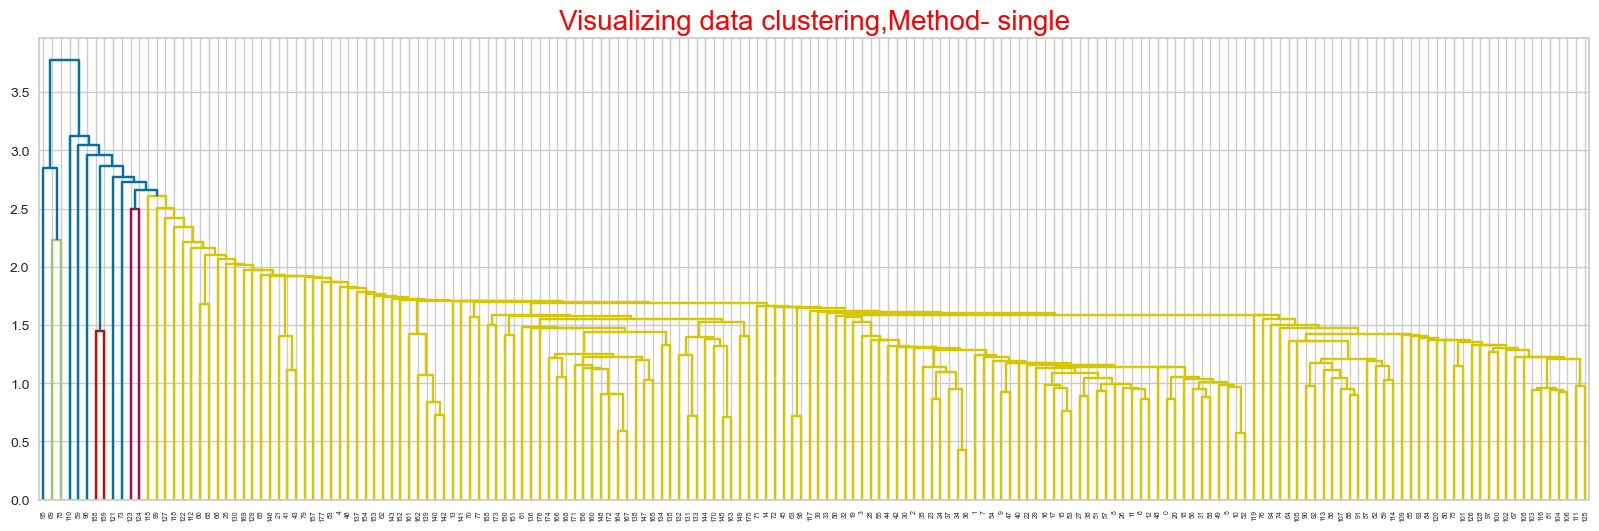

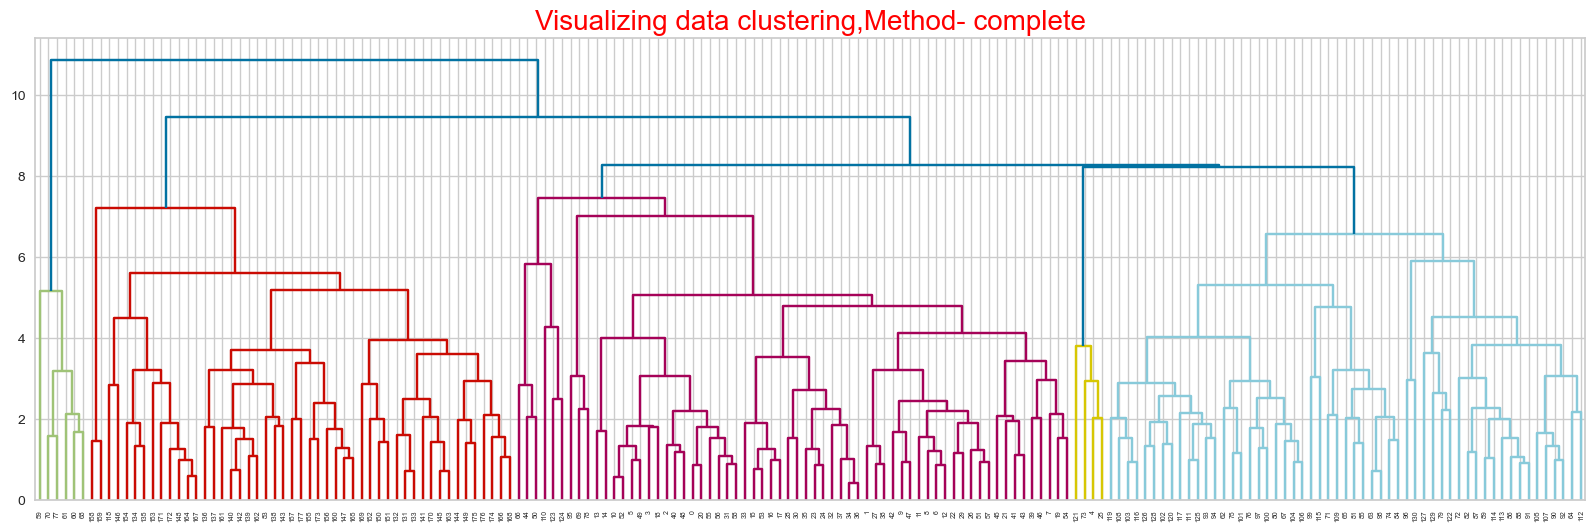

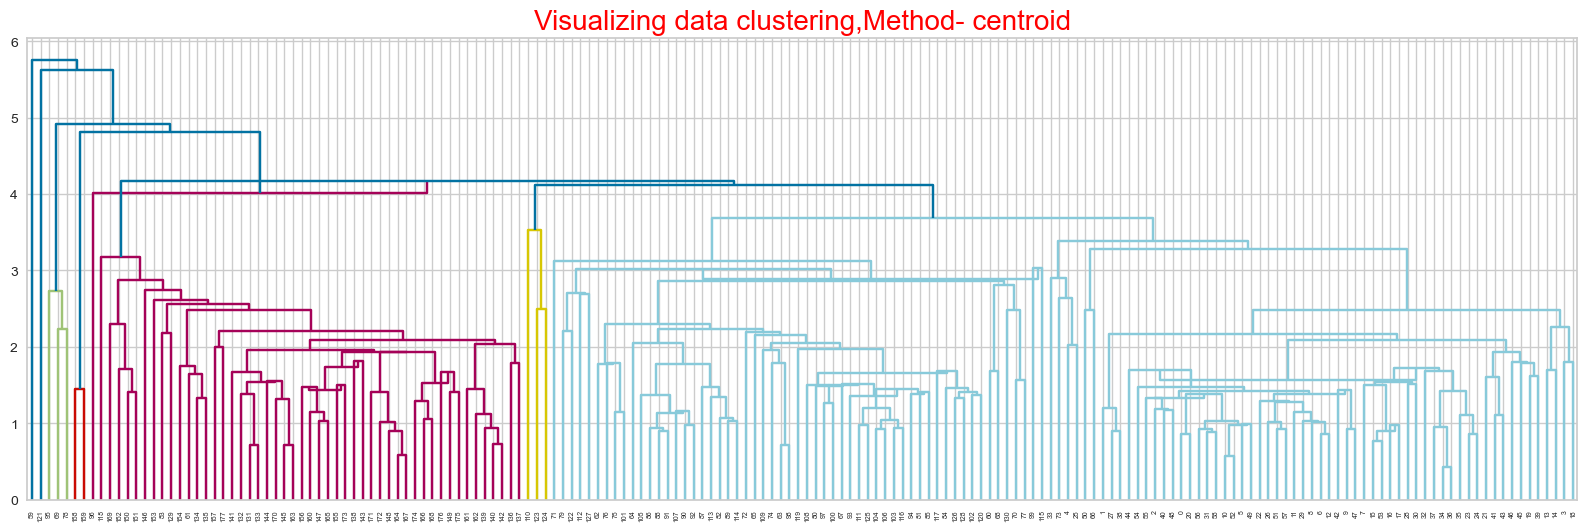

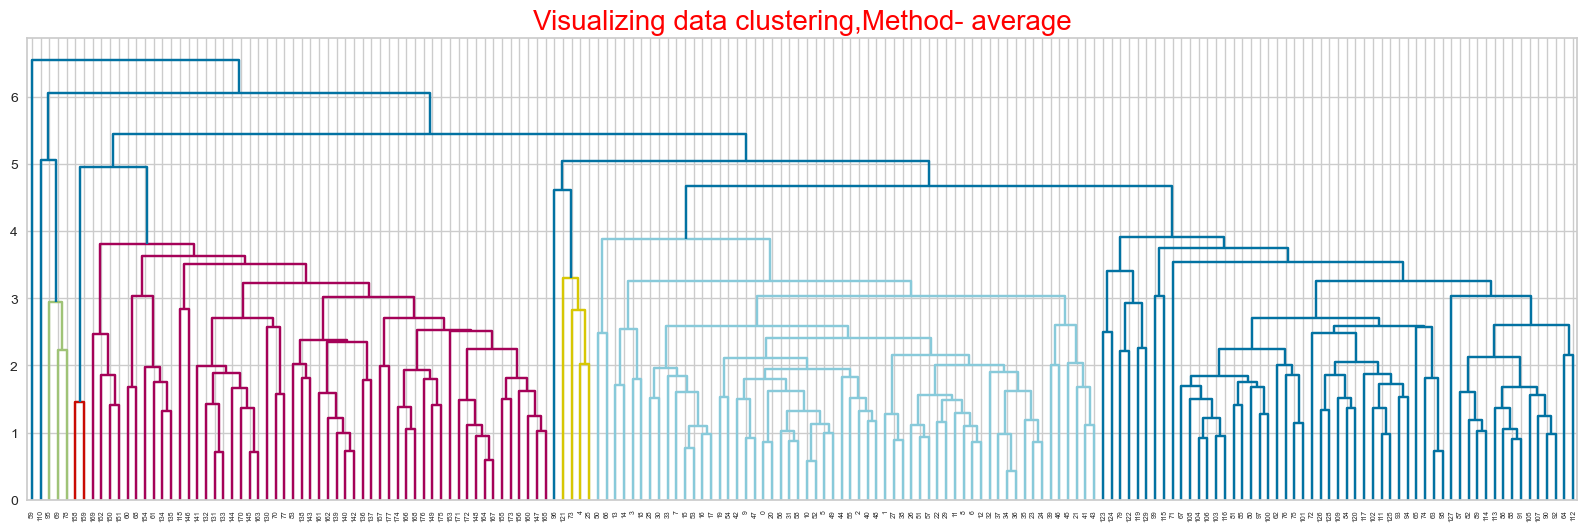

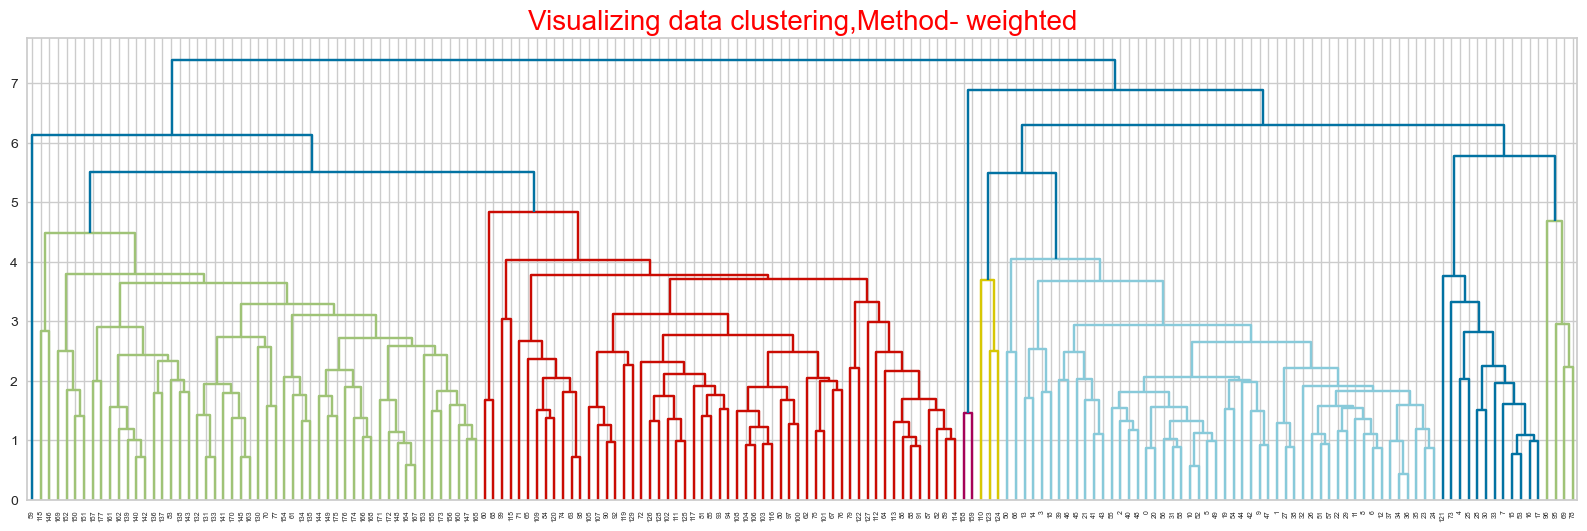

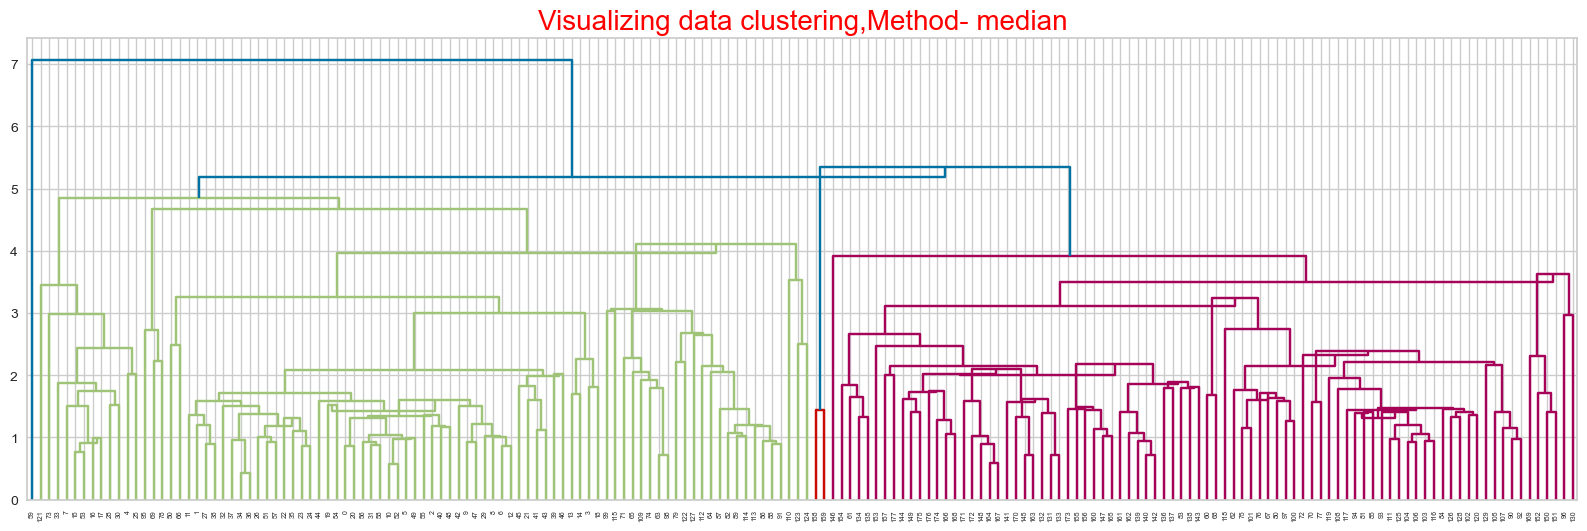

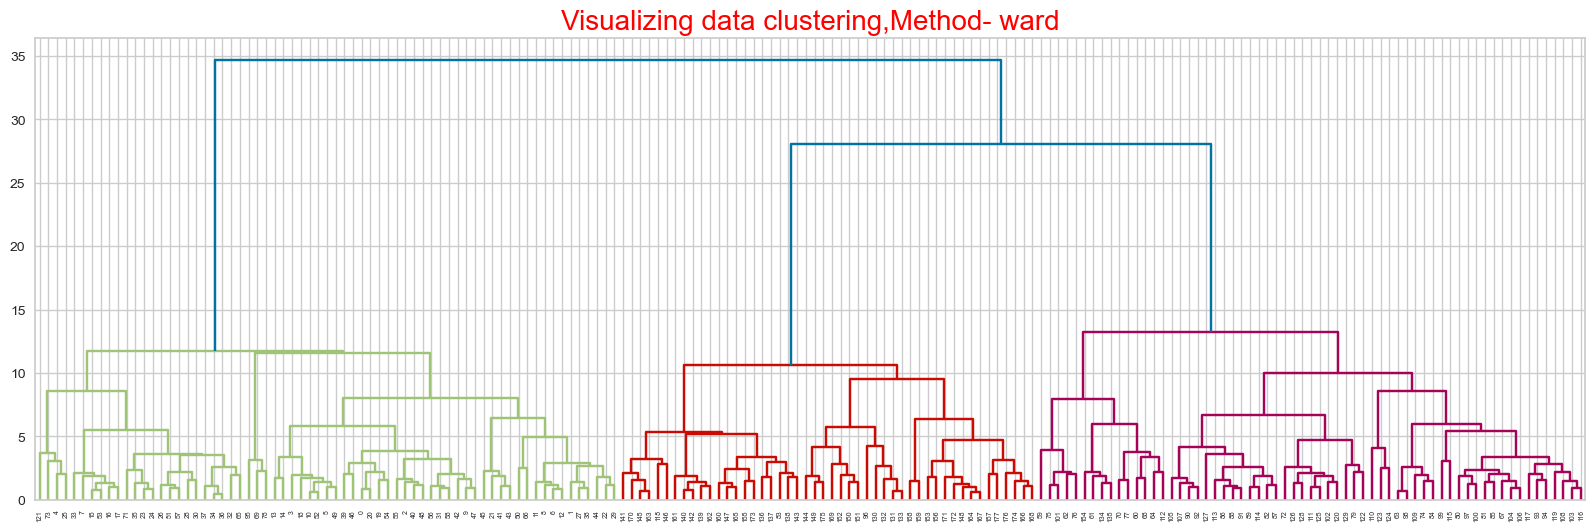

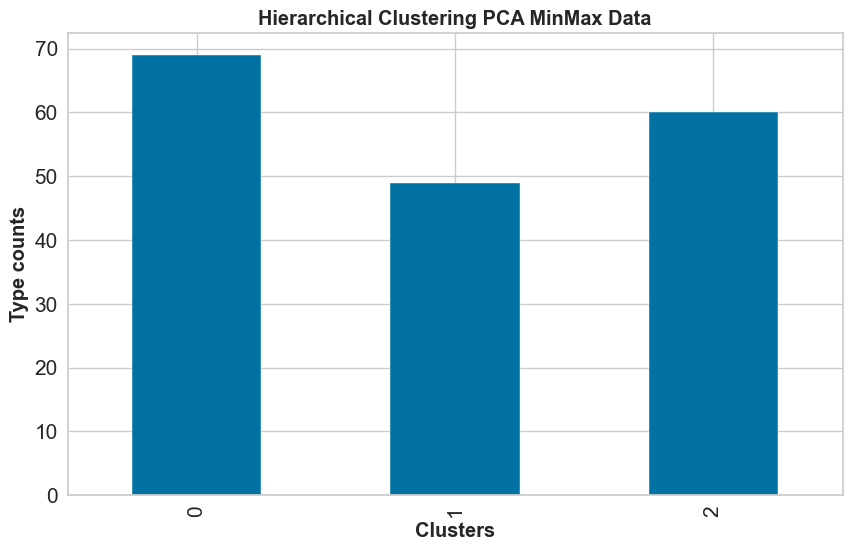

In [114]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
df2.groupby(['Hierarchical_labels']).count()['Type'].plot(kind='bar')
plt.ylabel('Type Counts')
plt.title('Hierarchical Clustering PCA MinMax Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Type counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


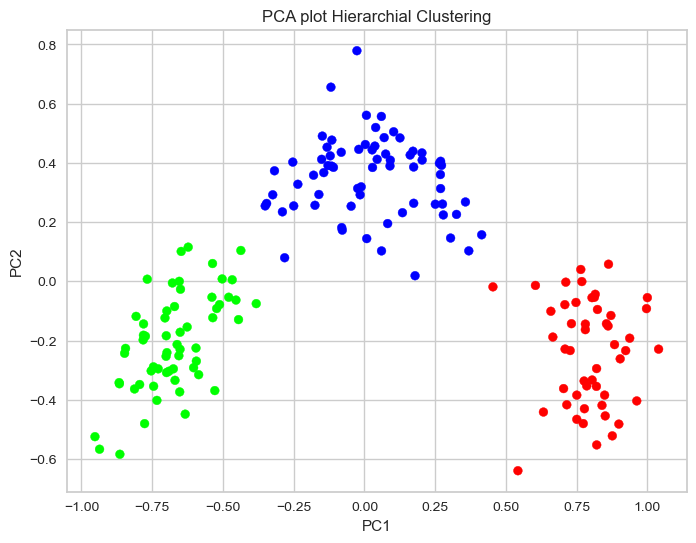

In [115]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(pca_components_min_final.iloc[:,0], pca_components_min_final.iloc[:,1], c=df2['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title('PCA plot Hierarchial Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


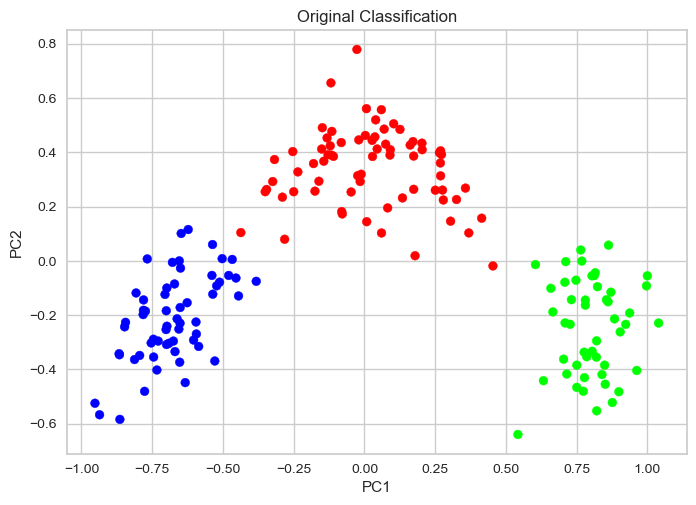

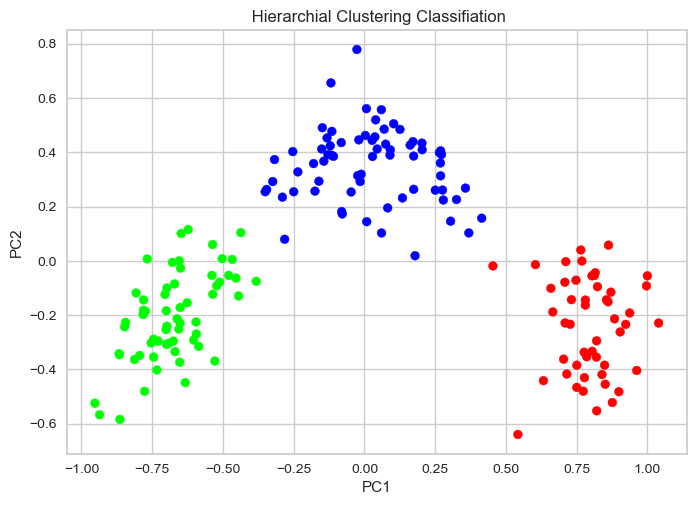

In [116]:
# Scatterplot
plt.scatter(pca_components_min_final.iloc[:,0], pca_components_min_final.iloc[:,1], c=df2['Type'], cmap="brg", s=40)

# Aesthetics
plt.title('Original Classification')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
# Scatterplot
plt.scatter(pca_components_min_final.iloc[:,0], pca_components_min_final.iloc[:,1], c=df2['Hierarchical_labels'], cmap="brg", s=40)

# Aesthetics
plt.title(' Hierarchial Clustering Classifiation')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [117]:
df2.groupby('Hierarchical_labels').agg(['mean'])

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmeans_label_min
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Hierarchical_labels,,,,,,,,,,,,,,,
0,2.000000,12.257246,1.908551,2.238551,20.063768,94.043478,2.252609,2.076232,0.362319,1.625652,3.057971,1.055739,2.786232,512.826087,1.0
1,2.979592,13.151633,3.344490,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.343265,0.685918,1.690204,627.551020,0.0
2,1.016667,13.732167,2.005000,2.458000,17.253333,106.883333,2.847833,2.980833,0.288667,1.900333,5.492000,1.066167,3.163500,1113.533333,2.0
